# 1. Prepare datasets

In [1]:
import pandas as pd
import os

In [3]:
# Create a folder named "datasets" if it doesn't exist
folder_name = "datasets"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

df = pd.read_csv("datasets/top_5_countries.csv", index_col=0, parse_dates=True)
# Reset index for Data Loader
df.reset_index(inplace=True)
df = df.iloc[:,:-6]

In [3]:
top_5_countries = ['DE', 'GB', 'ES', 'FR', 'IT']

# Split and save the datasets
for country_prefix in top_5_countries:
    # Filter columns with the specified prefix
    country_columns = [col for col in df.columns if col.startswith(country_prefix)]
    
    # Insert the date column at the beginning of every dataset
    country_columns.insert(0,"date")
    country_df = df[country_columns]
    
    # Save the DataFrame to a CSV file
    file_name = f"datasets/{country_prefix}_data.csv"
    country_df.to_csv(file_name, index=False)


# 2. Informer

In [ ]:
import subprocess
import os
# parent_directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
path_to_run_file = "/Users/valentyna/Documents/Master_thesis_new/TSLibrary/run.py"

def run_output(path_to_run_file, model_arguments):
    try:
        # Execute the script and capture the output
        command = ["python", "-u", path_to_run_file] + model_arguments
        output = subprocess.check_output(command, universal_newlines=True)
    except subprocess.CalledProcessError as e:
        output = e.output  

    return output

In [ ]:
datasets = ['DE_data.csv', 'GB_data.csv', 'ES_data.csv', 'FR_data.csv', 'IT_data.csv']
num_cols = ["5", "5", "3", "3", "3"]
pred_len = "24"

for i, dataset in enumerate(datasets):
    model_id = f"_{pred_len}_{dataset[:2]}"  # Create the model_id
    model_arguments = [
                "--task_name", "long_term_forecast",
                "--is_training", "1", #True
                "--root_path", "datasets/",
                "--data_path", dataset,
                # "--train_epochs", "1",
                "--model_id", '1',
                "--model", "Informer",
                "--data", "custom", # Use a custom dataloader (same data preparation as in ARIMA)
                "--features", "M", # Multivariate
                "--seq_len", "96",
                "--label_len", "48",
                "--pred_len", pred_len,
                "--e_layers", "2", 
                "--d_layers", "5",
                "--factor", "5",
                "--enc_in", num_cols[i], 
                "--dec_in", num_cols[i], 
                "--c_out", num_cols[i],
                "--des", "Exp",
                "--itr", "2",
            ]

model_output = run_output(path_to_run_file, model_arguments)
print(model_output)

# Test

In [4]:
df = pd.read_csv("datasets/GB_data.csv")
df_small = df.iloc[:240, :]

In [5]:
df_small.to_csv("datasets/GB_data_small.csv", index=False)

In [6]:
df_small

,date,GB_UKM_load_actual_entsoe_transparency,GB_UKM_solar_generation_actual,GB_UKM_wind_generation_actual,GB_UKM_wind_offshore_generation_actual,GB_UKM_wind_onshore_generation_actual
0,2015-10-26 00:00:00,30680.0,0.0,5348.0,1885.0,3463.0
1,2015-10-26 01:00:00,29218.0,0.0,5194.0,1810.0,3383.0
2,2015-10-26 02:00:00,28016.0,0.0,4389.0,1756.0,2633.0
3,2015-10-26 03:00:00,27402.0,0.0,5104.0,1687.0,3417.0
4,2015-10-26 04:00:00,27490.0,0.0,5206.0,1749.0,3456.0
...,...,...,...,...,...,...
235,2015-11-04 19:00:00,49595.0,0.0,1012.0,584.0,429.0
236,2015-11-04 20:00:00,46550.0,0.0,1246.0,792.0,455.0
237,2015-11-04 21:00:00,42752.0,0.0,1441.0,915.0,526.0
238,2015-11-04 22:00:00,38984.0,0.0,1430.0,912.0,518.0


In [1]:
# https://colab.research.google.com/drive/1rv2rKwQqgoHDNjXtRoAEWZ2ATz0gGAKu?usp=sharing#scrollTo=yu6zzic9t_Cz
# Popen: https://colab.research.google.com/github/aviadr1/learn-python/blob/master/content/13_multiprocessing/notebooks/os_system_subprocess.ipynb
import subprocess
import os
# parent_directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
path_to_run_file = '/vol/cs-hu/riabchuv/my_work/TSLibrary/run.py' #"/Users/valentyna/Documents/Master_thesis_new/TSLibrary/run.py"

def run_output(path_to_run_file, model_arguments):
    try:
        # Execute the script and capture the output
        command = ["python", "-u", path_to_run_file] + model_arguments
        output = subprocess.check_output(command, universal_newlines=True)
    except subprocess.CalledProcessError as e:
        output = e.output  

    return output

In [2]:
dp='GB_data_small.csv'

In [3]:
model_arguments = [
            "--task_name", "long_term_forecast",
            "--is_training", "1", #True
            "--root_path", "datasets/",
            "--data_path", dp,
            "--train_epochs", "1",
            "--model_id", '1',
            "--model", "Informer",
            "--data", "custom", # This ensures a 70%,10%,20% train,val,test split see data_provider/data_loader.py
            "--features", "M", # Multivariate
            "--seq_len", "20",
            "--label_len", "10",
            "--pred_len", '10',
            "--e_layers", "3", # Hyperparameters as in original model
            "--d_layers", "2",
            "--factor", "3",
            "--enc_in", "5", #str((num_columns)-1),
            "--dec_in", "5", #str((num_columns)-1),
            "--c_out", "5", # str((num_columns)-1),
            "--des", "Exp",
            "--itr", "2",
            "--train_epochs", "1",
            "--inverse",
        ]

model_output = run_output(path_to_run_file, model_arguments)
print(model_output)

Use GPU: cuda:0
>>>>>>>start training : long_term_forecast_1_Informer_custom_ftM_sl20_ll10_pl10_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 139
val 39
test 15
Epoch: 1 running time: 0.020170950889587404 min.
Epoch: 1, Steps: 5 | Train Loss: 0.9670790 Vali Loss: 1.8156426 Test Loss: 2.6099954
Validation loss decreased (inf --> 1.815643).  Saving model ...
Updating learning rate to 0.0001
>>>>>>>testing : long_term_forecast_1_Informer_custom_ftM_sl20_ll10_pl10_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_0<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
test 15
test shape: (15, 10, 5) (15, 10, 5)
test shape: (15, 10, 5) (15, 10, 5)
mse:10694611.0, mae:2371.6455078125
Use GPU: cuda:0
>>>>>>>start training : long_term_forecast_1_Informer_custom_ftM_sl20_ll10_pl10_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_1>>>>>>>>>>>>>>>>>>>>>>>>>>
train 139
val 39
test 15
Epoch: 1 running time: 0.010464016596476238 min.
Epoch: 1, Steps: 5 | Train Loss: 1.0279534 Vali Loss: 

In [3]:
model_arguments = [
            "--task_name", "long_term_forecast",
            "--is_training", "1", #True
            "--root_path", "datasets/",
            "--data_path", dp,
            "--train_epochs", "1",
            "--model_id", '1',
            "--model", "Informer",
            "--data", "custom", # This ensures a 70%,10%,20% train,val,test split see data_provider/data_loader.py
            "--features", "M", # Multivariate
            "--seq_len", "20",
            "--label_len", "10",
            "--pred_len", '10',
            "--e_layers", "3", # Hyperparameters as in original model
            "--d_layers", "2",
            "--factor", "3",
            "--enc_in", "5", #str((num_columns)-1),
            "--dec_in", "5", #str((num_columns)-1),
            "--c_out", "5", # str((num_columns)-1),
            "--des", "Exp",
            "--itr", "2",
            "--train_epochs", "1",
            "--inverse",
        ]

model_output = run_output(path_to_run_file, model_arguments)
print(model_output)

Use GPU: cuda:0
>>>>>>>start training : long_term_forecast_1_Informer_custom_ftM_sl20_ll10_pl10_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 139
val 39
test 15
Epoch: 1 running time: 0.020879960060119628 min.
Epoch: 1, Steps: 5 | Train Loss: 0.5335042 Vali Loss: 0.7527484 Test Loss: 1.1197095
Validation loss decreased (inf --> 0.752748).  Saving model ...
Updating learning rate to 0.0001
>>>>>>>testing : long_term_forecast_1_Informer_custom_ftM_sl20_ll10_pl10_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_0<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
test 15
test shape: (15, 10, 5) (15, 10, 5)
test shape: (15, 10, 5) (15, 10, 5)
mse:13610822.0, mae:2585.323974609375
Use GPU: cuda:0
>>>>>>>start training : long_term_forecast_1_Informer_custom_ftM_sl20_ll10_pl10_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_1>>>>>>>>>>>>>>>>>>>>>>>>>>
train 139
val 39
test 15
Epoch: 1 running time: 0.009805583953857422 min.
Epoch: 1, Steps: 5 | Train Loss: 0.5470862 Vali Loss

(array([155.,  24.,  17.,  11.,   9.,  11.,   4.,   4.,   3.,   2.]),
 array([   0. ,  260.1,  520.2,  780.3, 1040.4, 1300.5, 1560.6, 1820.7,
        2080.8, 2340.9, 2601. ]),
 <BarContainer object of 10 artists>)

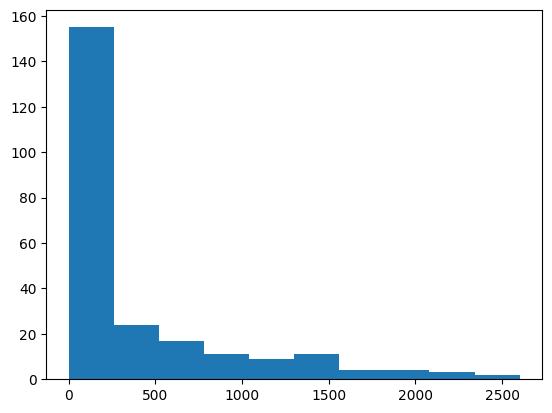

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/vol/cs-hu/riabchuv/my_work/datasets/GB_data_small.csv')
plt.hist(df['GB_UKM_solar_generation_actual'], bins=10)

In [9]:
model_output

'Use CPU\n>>>>>>>start training : long_term_forecast_1_Informer_custom_ftM_sl10_ll5_pl10_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>\ntrain 149\nval 15\ntest 39\nEpoch: 1 cost time: 31.332730054855347\nEpoch: 1, Steps: 4 | Train Loss: 0.9952646 Vali Loss: nan Test Loss: 1.1890596\nValidation loss decreased (inf --> nan).  Saving model ...\nUpdating learning rate to 0.0001\n>>>>>>>testing : long_term_forecast_1_Informer_custom_ftM_sl10_ll5_pl10_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_0<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<\ntest 39\ntest shape: (39, 1, 10, 5) (39, 1, 10, 5)\ntest shape: (39, 10, 5) (39, 10, 5)\nmse:1.1777945756912231, mae:0.8684789538383484\n'

In [10]:
print(model_output)

Use CPU
>>>>>>>start training : long_term_forecast_1_Informer_custom_ftM_sl10_ll5_pl10_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 149
val 15
test 39
Epoch: 1 cost time: 31.332730054855347
Epoch: 1, Steps: 4 | Train Loss: 0.9952646 Vali Loss: nan Test Loss: 1.1890596
Validation loss decreased (inf --> nan).  Saving model ...
Updating learning rate to 0.0001
>>>>>>>testing : long_term_forecast_1_Informer_custom_ftM_sl10_ll5_pl10_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_0<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
test 39
test shape: (39, 1, 10, 5) (39, 1, 10, 5)
test shape: (39, 10, 5) (39, 10, 5)
mse:1.1777945756912231, mae:0.8684789538383484



In [11]:
import re

# Define the regular expression 
pattern = r"mse:(.*?), mae:(.*?)$"

# Use re.search to find the pattern in the output string
match = re.search(pattern, model_output)

if match:
    # Extract the MSE and MAE values from the matched groups
    mse = float(match.group(1))
    mae = float(match.group(2))
    
    
    print("mse:", mse)
    print("mae:", mae)
else:
    print("No match found")


MSE: 1.1777945756912231
MAE: 0.8684789538383484


In [19]:
import numpy as np
# metrics
np.load("/Users/valentyna/Documents/Master_thesis_new/results/long_term_forecast_1_Informer_custom_ftM_sl10_ll5_pl10_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_0/metrics.npy")

array([  0.86847895,   1.1777946 ,   1.0852624 ,   3.2318454 ,
       769.5208    ], dtype=float32)

In [21]:
np.load("/Users/valentyna/Documents/Master_thesis_new/results/long_term_forecast_1_Informer_custom_ftM_sl10_ll5_pl10_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_0/pred.npy").shape

(39, 10, 5)

In [6]:
DIR = "/Users/valentyna/Documents/Master_thesis_new/TSLibrary/run.py"
command = ["python", "-u", DIR]
output = subprocess.check_output(command, universal_newlines=True)

usage: run.py [-h] --task_name TASK_NAME --is_training IS_TRAINING --model_id
              MODEL_ID --model MODEL --data DATA [--root_path ROOT_PATH]
              [--data_path DATA_PATH] [--features FEATURES] [--target TARGET]
              [--freq FREQ] [--checkpoints CHECKPOINTS] [--seq_len SEQ_LEN]
              [--label_len LABEL_LEN] [--pred_len PRED_LEN]
              [--seasonal_patterns SEASONAL_PATTERNS] [--inverse]
              [--mask_rate MASK_RATE] [--anomaly_ratio ANOMALY_RATIO]
              [--top_k TOP_K] [--num_kernels NUM_KERNELS] [--enc_in ENC_IN]
              [--dec_in DEC_IN] [--c_out C_OUT] [--d_model D_MODEL]
              [--n_heads N_HEADS] [--e_layers E_LAYERS] [--d_layers D_LAYERS]
              [--d_ff D_FF] [--moving_avg MOVING_AVG] [--factor FACTOR]
              [--distil] [--dropout DROPOUT] [--embed EMBED]
              [--activation ACTIVATION] [--output_attention]
              [--channel_independence CHANNEL_INDEPENDENCE]
              [--decomp

CalledProcessError: Command '['python', '-u', '/Users/valentyna/Documents/Master_thesis_new/TSLibrary/run.py']' returned non-zero exit status 2.

In [4]:
script_path

'/Users/valentyna/Documents/run.py'

In [ ]:
import os
import torch
from exp.exp_long_term_forecasting import Exp_Long_Term_Forecast
import random
import numpy as np

def run_experiment(config):
    fix_seed = 2021
    random.seed(fix_seed)
    torch.manual_seed(fix_seed)
    np.random.seed(fix_seed)

    args = config.copy()  # Copy the configuration dictionary
    
    args['use_gpu'] = True if torch.cuda.is_available() and args['use_gpu'] else False

    if args['use_gpu'] and args['use_multi_gpu']:
        args['devices'] = args['devices'].replace(' ', '')
        device_ids = args['devices'].split(',')
        args['device_ids'] = [int(id_) for id_ in device_ids]
        args['gpu'] = args['device_ids'][0]

    print('Args in experiment:')
    print(args)

    Exp = Exp_Long_Term_Forecast

    if args['is_training']:
        for ii in range(args['itr']):
            # setting record of experiments
            setting = '{}_{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
                args['task_name'],
                args['model_id'],
                args['model'],
                args['data'],
                args['features'],
                args['seq_len'],
                args['label_len'],
                args['pred_len'],
                args['d_model'],
                args['n_heads'],
                args['e_layers'],
                args['d_layers'],
                args['d_ff'],
                args['factor'],
                args['embed'],
                args['distil'],
                args['des'], ii)
            exp = Exp(args)  # set experiments
            print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
            exp.train(setting)

            print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
            exp.test(setting)
            torch.cuda.empty_cache()
    else:
        ii = 0
        setting = '{}_{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
            args['task_name'],
            args['model_id'],
            args['model'],
            args['data'],
            args['features'],
            args['seq_len'],
            args['label_len'],
            args['pred_len'],
            args['d_model'],
            args['n_heads'],
            args['e_layers'],
            args['d_layers'],
            args['d_ff'],
            args['factor'],
            args['embed'],
            args['distil'],
            args['des'], ii)

        exp = Exp(args)  # set experiments
        print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
        exp.test(setting, test=1)
        torch.cuda.empty_cache()

# Example configuration
config = {
    'task_name': 'long_term_forecast',
    'is_training': 1,
    'model_id': 'test',
    'model': 'Autoformer',
    'data': 'ETTm1',
    'root_path': './data/ETT/',
    'data_path': 'ETTh1.csv',
    'features': 'M',
    'target': 'OT',
    'freq': 'h',
    'checkpoints': './checkpoints/',
    'seq_len': 96,
    'label_len': 48,
    'pred_len': 96,
    'seasonal_patterns': 'Monthly',
    'inverse': False,
    'mask_rate': 0.25,
    'anomaly_ratio': 0.25,
    'top_k': 5,
    'num_kernels': 6,
    'enc_in': 7,
    'dec_in': 7,
    'c_out': 7,
    'd_model': 512,
    'n_heads': 8,
    'e_layers': 2,
    'd_layers': 1,
    'd_ff': 2048,
    'moving_avg': 25,
    'factor': 1,
    'distil': True,
    'dropout': 0.1,
    'embed': 'timeF',
    'activation': 'gelu',
    'output_attention': False,
    'num_workers': 10,
    'itr': 1,
    'train_epochs': 10,
    'batch_size': 32,
    'patience': 3,
    'learning_rate': 0.0001,
    'des': 'test',
    'loss': 'MSE',
    'lradj': 'type1',
    'use_amp': False,
    'use_gpu': True,
    'gpu': 0,
    'use_multi_gpu': False,
    'devices': '0,1,2,3',
    'p_hidden_dims': [128, 128],
    'p_hidden_layers': 2
}

# Run the experiment with the configuration
run_experiment(config)
